| Greek | Symbol | Definition | Mathematical Formula (for Call option C) | Importance |
| :--- | :--- | :--- | :--- | :--- |
| Delta | $\Delta$ | Sensitivity of option price to the underlying asset price | $\Delta=\frac{\partial C}{\partial S}=N\left(d_1\right)$ | Measures hedge ratio; for calls, delta € [0,1] |
| Gamma | $\Gamma$ | Sensitivity of delta to underlying price | $\Gamma=\frac{\delta^2 C}{\partial S^2}=\frac{N^{\prime}\left(d_1\right)}{S \sigma \sqrt{T}}$ | Shows how quickly delta changes; important for hedging |
| Theta | $\theta$ | Sensitivity of option price to time decay | $\Theta=\frac{\partial C}{\partial T}=-\frac{S N^{\prime}\left(d_1\right) \sigma}{2 \sqrt{T}}-r K e^{-r T} N\left(d_2\right)$ | Measures time decay of option value |
| Vega | $\nu$ | Sensitivity of option price to volatility | $\nu=\frac{\partial C}{\partial \sigma}=S \sqrt{T} N^{\prime}\left(d_1\right)$ | Indicates impact of volatility changes |
| Rho | $\rho$ | Sensitivity of option price to interest rate | $\rho=\frac{\partial C}{\partial r}=K T e^{-r T} N\left(d_2\right)$ | Useful for assessing interest rate risk |
| Psi | $\Psi$ | Sensitivity to dividend yield $\boldsymbol{d}$ | $\mathbf{\Psi}=-T S e^{-d T} N\left(d_1\right)$ | Important for dividend-paying assets |

| Greek | Interpretation | Usage |
| :--- | :--- | :--- |
| Delta | How much the option price moves with a small change in stock price | Used for delta-hedging |
| Gamma | Risk in delta; shows how much delta changes | Helps in second-order hedging |
| Theta | How much the option loses value per day | Important for time decay strategies |
| Vega | How much option price changes with volatility | Crucial in volatile markets |
| Rho | How much option price changes with interest rates | Important in macroeconomic shifts |
| Psi | Shows sensitivity to dividends | Necessary for dividend-paying stocks |

The above formulas dont consider dividents... 

| Greek     | Symbol   | Definition                                                | Mathematical Formula (for Call option $C$)                                                                                     | Importance                                             |
| --------- | -------- | --------------------------------------------------------- | ------------------------------------------------------------------------------------------------------------------------------ | ------------------------------------------------------ |
| **Delta** | $\Delta$ | Sensitivity of option price to the underlying asset price | $\Delta = \frac{\partial C}{\partial S} = e^{-dT} N(d_1)$                                                                      | Measures hedge ratio; for calls, delta ∈ $[0,1]$       |
| **Gamma** | $\Gamma$ | Sensitivity of delta to underlying price                  | $\Gamma = \frac{\partial^2 C}{\partial S^2} = \frac{e^{-dT} N'(d_1)}{S \sigma \sqrt{T}}$                                       | Shows how quickly delta changes; important for hedging |
| **Theta** | $\Theta$ | Sensitivity of option price to time decay                 | $\Theta = \frac{\partial C}{\partial T} = -\frac{S e^{-dT} N'(d_1) \sigma}{2\sqrt{T}} - rK e^{-rT} N(d_2) + dS e^{-dT} N(d_1)$ | Measures time decay of option value                    |
| **Vega**  | $\nu$    | Sensitivity of option price to volatility                 | $\nu = \frac{\partial C}{\partial \sigma} = S e^{-dT} \sqrt{T} N'(d_1)$                                                        | Indicates impact of volatility changes                 |
| **Rho**   | $\rho$   | Sensitivity of option price to interest rate              | $\rho = \frac{\partial C}{\partial r} = K T e^{-rT} N(d_2)$                                                                    | Useful for assessing interest rate risk                |
| **Psi**   | $\Psi$   | Sensitivity to dividend yield $d$                         | $\Psi = \frac{\partial C}{\partial d} = -T S e^{-dT} N(d_1)$                                                                   | Important for dividend-paying assets                   |


In [3]:
import numpy as np
from scipy.stats import norm

def d1(S, K, T, r, d, sigma):
    return (np.log(S / K) + (r - d + 0.5 * sigma**2) * T) / (sigma * np.sqrt(T))

def d2(S, K, T, r, d, sigma):
    return d1(S, K, T, r, d, sigma) - sigma * np.sqrt(T)

def bs_price_call(S, K, T, r, d, sigma):
    D1 = d1(S, K, T, r, d, sigma)
    D2 = d2(S, K, T, r, d, sigma)
    return S * np.exp(-d*T) * norm.cdf(D1) - K * np.exp(-r*T) * norm.cdf(D2)

def bs_price_put(S, K, T, r, d, sigma):
    D1 = d1(S, K, T, r, d, sigma)
    D2 = d2(S, K, T, r, d, sigma)
    return K * np.exp(-r*T) * norm.cdf(-D2) - S * np.exp(-d*T) * norm.cdf(-D1)



# ---- Delta ----
def delta_call(S, K, T, r, d, sigma):
    return np.exp(-d*T) * norm.cdf(d1(S, K, T, r, d, sigma))

def delta_put(S, K, T, r, d, sigma):
    return -np.exp(-d*T) * norm.cdf(-d1(S, K, T, r, d, sigma))

# ---- Gamma ----
def gamma(S, K, T, r, d, sigma):
    D1 = d1(S, K, T, r, d, sigma)
    return np.exp(-d*T) * norm.pdf(D1) / (S * sigma * np.sqrt(T))

# ---- Vega ----
def vega(S, K, T, r, d, sigma):
    D1 = d1(S, K, T, r, d, sigma)
    return S * np.exp(-d*T) * norm.pdf(D1) * np.sqrt(T)

# ---- Theta ----
def theta_call(S, K, T, r, d, sigma):
    D1 = d1(S, K, T, r, d, sigma)
    D2 = d2(S, K, T, r, d, sigma)
    term1 = -S * norm.pdf(D1) * sigma * np.exp(-d*T) / (2 * np.sqrt(T))
    term2 = -r * K * np.exp(-r*T) * norm.cdf(D2)
    term3 = d * S * np.exp(-d*T) * norm.cdf(D1)
    return term1 + term2 + term3

def theta_put(S, K, T, r, d, sigma):
    D1 = d1(S, K, T, r, d, sigma)
    D2 = d2(S, K, T, r, d, sigma)
    term1 = -S * norm.pdf(D1) * sigma * np.exp(-d*T) / (2 * np.sqrt(T))
    term2 = r * K * np.exp(-r*T) * norm.cdf(-D2)
    term3 = d * S * np.exp(-d*T) * norm.cdf(-D1)
    return term1 + term2 - term3

# ---- Rho ----
def rho_call(S, K, T, r, d, sigma):
    return K * T * np.exp(-r*T) * norm.cdf(d2(S, K, T, r, d, sigma))

def rho_put(S, K, T, r, d, sigma):
    return -K * T * np.exp(-r*T) * norm.cdf(-d2(S, K, T, r, d, sigma))


In [5]:
# Sample parameters
S = 100    # Spot price
K = 100    # Strike price
T = 1.0    # Time to maturity
r = 0.05   # Risk-free rate
d = 0.0   # Dividend yield
sigma = 0.2  # Volatility

# Prices
print("Call Price:", bs_price_call(S, K, T, r, d, sigma))
print("Put Price: ", bs_price_put(S, K, T, r, d, sigma))

# Greeks
print("Delta (Call):", delta_call(S, K, T, r, d, sigma))
print("Delta (Put): ", delta_put(S, K, T, r, d, sigma))
print("Gamma:       ", gamma(S, K, T, r, d, sigma))
print("Vega:        ", vega(S, K, T, r, d, sigma))
print("Theta (Call):", theta_call(S, K, T, r, d, sigma))
print("Theta (Put): ", theta_put(S, K, T, r, d, sigma))
print("Rho (Call):  ", rho_call(S, K, T, r, d, sigma))
print("Rho (Put):   ", rho_put(S, K, T, r, d, sigma))


Call Price: 10.450583572185565
Put Price:  5.573526022256971
Delta (Call): 0.6368306511756191
Delta (Put):  -0.3631693488243809
Gamma:        0.018762017345846895
Vega:         37.52403469169379
Theta (Call): -6.414027546438197
Theta (Put):  -1.657880423934626
Rho (Call):   53.232481545376345
Rho (Put):    -41.89046090469506


| Greek          | Value    | Interpretation                                                 |
| -------------- | -------- | -------------------------------------------------------------- |
| **Call Delta** | `+0.637` | If the stock increases ₹1, the call price increases by ₹0.637. |
| **Put Delta**  | `–0.363` | If the stock increases ₹1, the put price decreases by ₹0.363.  |

Sum of call and put delta: ~1 (Put-Call Parity).

| Greek     | Value     | Interpretation                                                                                                               |
| --------- | --------- | ---------------------------------------------------------------------------------------------------------------------------- |
| **Gamma** | `0.01876` | Measures how much **delta** will change per ₹1 move in the stock. Both calls and puts have the same gamma. Highest near ATM. |


A gamma of 0.01876 means delta will change by ~0.019 for each ₹1 move in the stock price.

| Greek    | Value   | Interpretation                                                                                                               |
| -------- | ------- | ---------------------------------------------------------------------------------------------------------------------------- |
| **Vega** | `37.52` | If volatility increases by 1% (0.01), the call/put price increases by ₹0.3752. Higher for ATM options and longer maturities. |


| Greek          | Value   | Interpretation                                                                            |
| -------------- | ------- | ----------------------------------------------------------------------------------------- |
| **Call Theta** | `–6.41` | The call option loses \~₹6.41 per year as time passes (holding everything else constant). |
| **Put Theta**  | `–1.66` | The put loses less to time decay.                                                         |


Time decay is higher for calls in this case, partly because calls are more expensive and there's less dividend drag.

| Greek        | Value    | Interpretation                                                         |
| ------------ | -------- | ---------------------------------------------------------------------- |
| **Call Rho** | `+53.23` | If interest rate increases by 1%, the call value increases by ₹0.5323. |
| **Put Rho**  | `–41.89` | If interest rate increases by 1%, the put value decreases by ₹0.4189.  |


This aligns with intuition:

- Higher r benefits calls (discounted strike is cheaper).
- Higher r hurts puts (you could earn more elsewhere).

#### (i) The Delta of a call option as a function of spot.

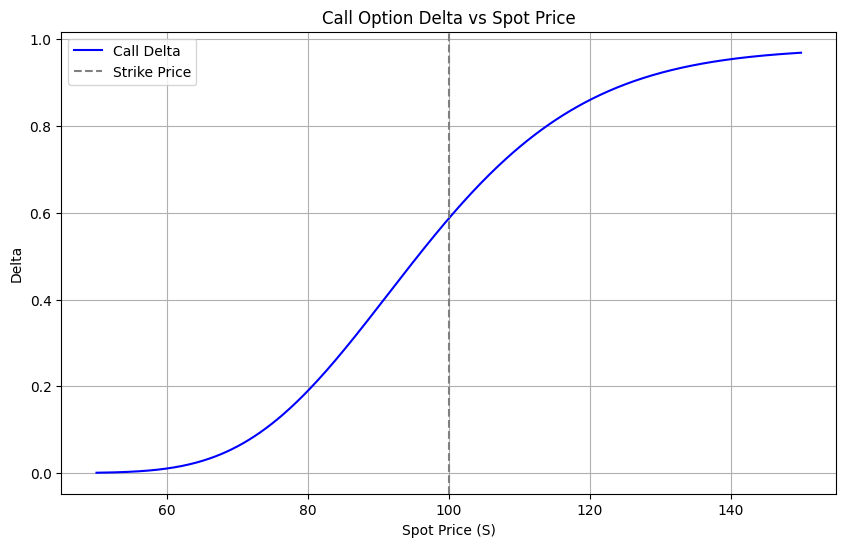

In [6]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm

# Black-Scholes d1
def d1(S, K, T, r, d, sigma):
    return (np.log(S / K) + (r - d + 0.5 * sigma ** 2) * T) / (sigma * np.sqrt(T))

# Call Delta with dividend yield
def delta_call(S, K, T, r, d, sigma):
    return np.exp(-d * T) * norm.cdf(d1(S, K, T, r, d, sigma))

# Parameters
K = 100      # Strike price
T = 1        # Time to maturity
r = 0.05     # Risk-free rate
d = 0.02     # Dividend yield
sigma = 0.2  # Volatility

# Spot price range
S = np.linspace(50, 150, 500)

# Compute Delta for each spot
delta_vals = delta_call(S, K, T, r, d, sigma)

# Plot
plt.figure(figsize=(10, 6))
plt.plot(S, delta_vals, label='Call Delta', color='blue')
plt.axvline(x=K, color='gray', linestyle='--', label='Strike Price')
plt.title("Call Option Delta vs Spot Price")
plt.xlabel("Spot Price (S)")
plt.ylabel("Delta")
plt.legend()
plt.grid(True)
plt.show()


#### (ii) The Delta of a call option as a function of time for in-the-money, out-of-themoney and at-the-money options.

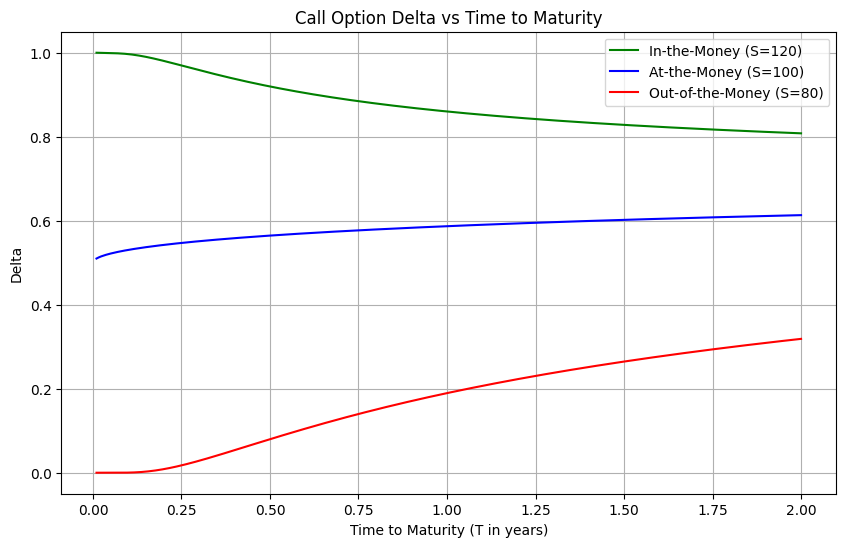

In [7]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm

# d1 formula
def d1(S, K, T, r, d, sigma):
    return (np.log(S / K) + (r - d + 0.5 * sigma ** 2) * T) / (sigma * np.sqrt(T))

# Delta of a call option with dividend yield
def delta_call(S, K, T, r, d, sigma):
    return np.exp(-d * T) * norm.cdf(d1(S, K, T, r, d, sigma))

# Parameters
K = 100       # Strike price
r = 0.05      # Risk-free rate
d = 0.02      # Dividend yield
sigma = 0.2   # Volatility

# Time to maturity from very short to long term
T_vals = np.linspace(0.01, 2, 300)

# Spot prices for ITM, ATM, and OTM
S_ITM = 120
S_ATM = 100
S_OTM = 80

# Delta values over time
delta_ITM = [delta_call(S_ITM, K, T, r, d, sigma) for T in T_vals]
delta_ATM = [delta_call(S_ATM, K, T, r, d, sigma) for T in T_vals]
delta_OTM = [delta_call(S_OTM, K, T, r, d, sigma) for T in T_vals]

# Plot
plt.figure(figsize=(10, 6))
plt.plot(T_vals, delta_ITM, label='In-the-Money (S=120)', color='green')
plt.plot(T_vals, delta_ATM, label='At-the-Money (S=100)', color='blue')
plt.plot(T_vals, delta_OTM, label='Out-of-the-Money (S=80)', color='red')
plt.title("Call Option Delta vs Time to Maturity")
plt.xlabel("Time to Maturity (T in years)")
plt.ylabel("Delta")
plt.legend()
plt.grid(True)
plt.show()


#### (iii) The Gamma of a call option as a function of spot,

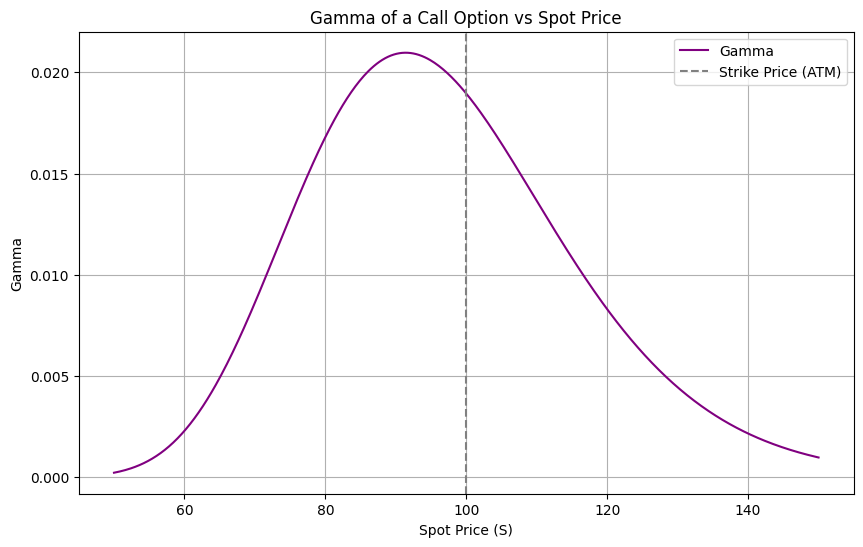

In [8]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm

# d1 function
def d1(S, K, T, r, d, sigma):
    return (np.log(S / K) + (r - d + 0.5 * sigma**2) * T) / (sigma * np.sqrt(T))

# Gamma formula (same for call and put)
def gamma(S, K, T, r, d, sigma):
    d1_val = d1(S, K, T, r, d, sigma)
    return (np.exp(-d * T) * norm.pdf(d1_val)) / (S * sigma * np.sqrt(T))

# Parameters
K = 100       # Strike price
T = 1         # Time to maturity
r = 0.05      # Risk-free rate
d = 0.02      # Dividend yield
sigma = 0.2   # Volatility

# Spot price range
S = np.linspace(50, 150, 500)

# Compute gamma values
gamma_vals = gamma(S, K, T, r, d, sigma)

# Plot
plt.figure(figsize=(10, 6))
plt.plot(S, gamma_vals, color='purple', label='Gamma')
plt.axvline(x=K, color='gray', linestyle='--', label='Strike Price (ATM)')
plt.title("Gamma of a Call Option vs Spot Price")
plt.xlabel("Spot Price (S)")
plt.ylabel("Gamma")
plt.legend()
plt.grid(True)
plt.show()


#### (iv) The Vega of a call option as a function of volatility, as a function of spot and as a function of time.

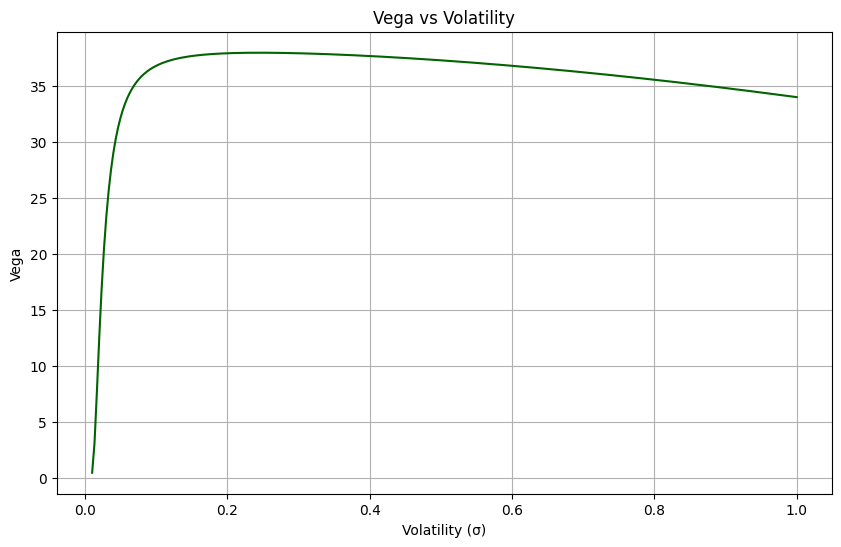

In [9]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm

def d1(S, K, T, r, d, sigma):
    return (np.log(S / K) + (r - d + 0.5 * sigma**2) * T) / (sigma * np.sqrt(T))

def vega(S, K, T, r, d, sigma):
    d1_val = d1(S, K, T, r, d, sigma)
    return S * np.exp(-d * T) * norm.pdf(d1_val) * np.sqrt(T)

# Fixed parameters
S = 100
K = 100
T = 1
r = 0.05
d = 0.02
vol_range = np.linspace(0.01, 1.0, 300)

vega_vals = [vega(S, K, T, r, d, sigma) for sigma in vol_range]

plt.figure(figsize=(10, 6))
plt.plot(vol_range, vega_vals, color='darkgreen')
plt.title("Vega vs Volatility")
plt.xlabel("Volatility (σ)")
plt.ylabel("Vega")
plt.grid(True)
plt.show()


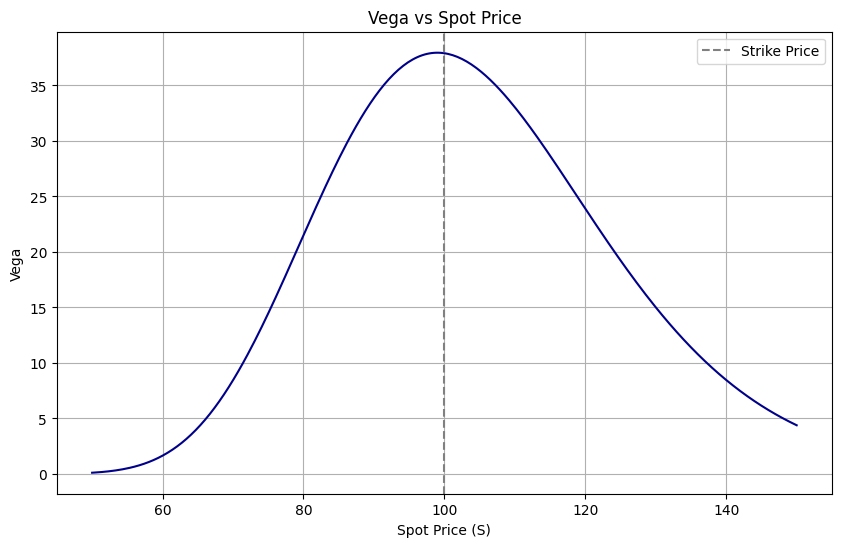

In [10]:
spot_range = np.linspace(50, 150, 300)
sigma = 0.2  # fixed volatility

vega_vals_spot = [vega(S, K, T, r, d, sigma) for S in spot_range]

plt.figure(figsize=(10, 6))
plt.plot(spot_range, vega_vals_spot, color='darkblue')
plt.axvline(x=K, color='gray', linestyle='--', label='Strike Price')
plt.title("Vega vs Spot Price")
plt.xlabel("Spot Price (S)")
plt.ylabel("Vega")
plt.legend()
plt.grid(True)
plt.show()


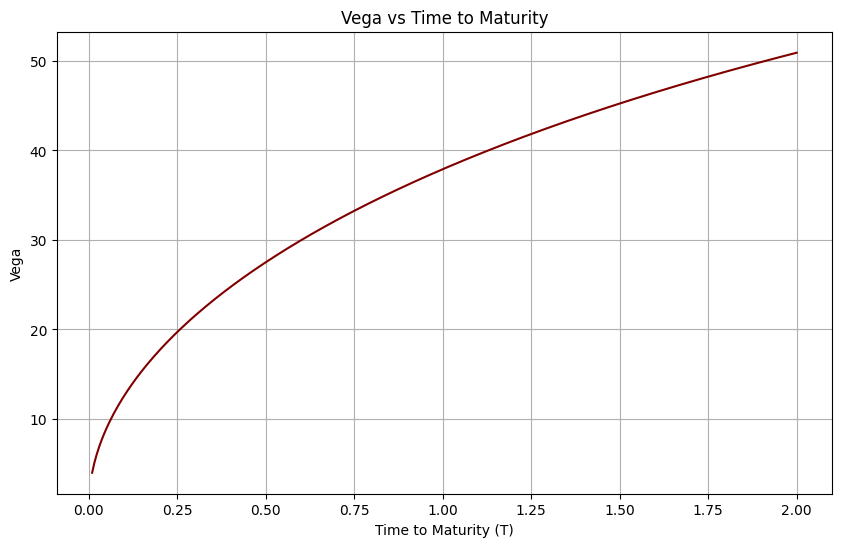

In [11]:
T_range = np.linspace(0.01, 2, 300)
S = 100
vega_vals_time = [vega(S, K, T, r, d, sigma) for T in T_range]

plt.figure(figsize=(10, 6))
plt.plot(T_range, vega_vals_time, color='maroon')
plt.title("Vega vs Time to Maturity")
plt.xlabel("Time to Maturity (T)")
plt.ylabel("Vega")
plt.grid(True)
plt.show()


### Monte Carlo

In [13]:
import numpy as np

# Monte Carlo pricing using GBM
def gbm_monte_carlo_call_price(S0, K, T, r, d, sigma, n_paths=100000):
    Z = np.random.randn(n_paths)
    ST = S0 * np.exp((r - d - 0.5 * sigma**2) * T + sigma * np.sqrt(T) * Z)
    payoff = np.maximum(ST - K, 0)
    return np.exp(-r * T) * np.mean(payoff)

# Greeks using finite differences
def gbm_monte_carlo_greeks(S0, K, T, r, d, sigma, h=1e-2, n_paths=100000):
    price = gbm_monte_carlo_call_price(S0, K, T, r, d, sigma, n_paths)

    # Delta
    price_up = gbm_monte_carlo_call_price(S0 + h, K, T, r, d, sigma, n_paths)
    delta = (price_up - price) / h

    # Gamma
    price_down = gbm_monte_carlo_call_price(S0 - h, K, T, r, d, sigma, n_paths)
    gamma = (price_up - 2 * price + price_down) / h**2

    # Vega
    price_sigma_up = gbm_monte_carlo_call_price(S0, K, T, r, d, sigma + h, n_paths)
    vega = (price_sigma_up - price) / h

    # Rho
    price_r_up = gbm_monte_carlo_call_price(S0, K, T, r + h, d, sigma, n_paths)
    rho = (price_r_up - price) / h

    # Theta
    price_T_down = gbm_monte_carlo_call_price(S0, K, T - h, r, d, sigma, n_paths)
    theta = (price_T_down - price) / -h

    return {
        "price": price,
        "delta": delta,
        "gamma": gamma,
        "vega": vega,
        "rho": rho,
        "theta": theta
    }

# Example parameters
S0 = 100
K = 100
T = 1
r = 0.05
d = 0.0
sigma = 0.2

# Run and print the results
results = gbm_monte_carlo_greeks(S0, K, T, r, d, sigma)
for greek, value in results.items():
    print(f"{greek.capitalize():<6}: {value:.4f}")


Price : 10.4679
Delta : -9.6679
Gamma : -1157.3501
Vega  : 31.9924
Rho   : 56.3637
Theta : 8.7872


In [14]:
import numpy as np
from scipy.stats import norm

# Black-Scholes d1 and d2 functions
def d1(S, K, T, r, d, sigma):
    return (np.log(S / K) + (r - d + 0.5 * sigma ** 2) * T) / (sigma * np.sqrt(T))

def d2(S, K, T, r, d, sigma):
    return d1(S, K, T, r, d, sigma) - sigma * np.sqrt(T)

# Monte Carlo engine for call option pricing
def monte_carlo_call_price(S, K, T, r, d, sigma, n_paths=100000):
    Z = np.random.randn(n_paths)
    ST = S * np.exp((r - d - 0.5 * sigma ** 2) * T + sigma * np.sqrt(T) * Z)
    payoff = np.maximum(ST - K, 0)
    return np.exp(-r * T) * np.mean(payoff)

# Greeks using finite difference approximation
def monte_carlo_greeks(S, K, T, r, d, sigma, h=1e-2, n_paths=100000):
    # Vega (∂Price/∂σ)
    price = monte_carlo_call_price(S, K, T, r, d, sigma, n_paths)
    price_up = monte_carlo_call_price(S, K, T, r, d, sigma + h, n_paths)
    vega = (price_up - price) / h

    # Delta (∂Price/∂S)
    price_S_up = monte_carlo_call_price(S + h, K, T, r, d, sigma, n_paths)
    delta = (price_S_up - price) / h

    # Gamma (∂²Price/∂S²)
    price_S_down = monte_carlo_call_price(S - h, K, T, r, d, sigma, n_paths)
    gamma = (price_S_up - 2 * price + price_S_down) / h**2

    # Rho (∂Price/∂r)
    price_r_up = monte_carlo_call_price(S, K, T, r + h, d, sigma, n_paths)
    rho = (price_r_up - price) / h

    # Theta (∂Price/∂T)
    price_T_down = monte_carlo_call_price(S, K, T - h, r, d, sigma, n_paths)
    theta = (price_T_down - price) / -h  # negative as time decay

    return {
        "price": price,
        "delta": delta,
        "gamma": gamma,
        "vega": vega,
        "rho": rho,
        "theta": theta
    }

# Parameters
S = 100      # Spot price
K = 100      # Strike price
T = 1        # Time to maturity (1 year)
r = 0.05     # Risk-free interest rate
d = 0.0     # Dividend yield
sigma = 0.2  # Volatility

# Compute greeks
greeks = monte_carlo_greeks(S, K, T, r, d, sigma)
greeks


{'price': 10.48476728568729,
 'delta': -3.0981486871777264,
 'gamma': -1500.096205132202,
 'vega': 33.58655308023639,
 'rho': 54.10963082716922,
 'theta': 11.691472788429103}

Call Price: 10.450583572185565
Put Price:  5.573526022256971
Delta (Call): 0.6368306511756191
Delta (Put):  -0.3631693488243809
Gamma:        0.018762017345846895
Vega:         37.52403469169379
Theta (Call): -6.414027546438197
Theta (Put):  -1.657880423934626
Rho (Call):   53.232481545376345
Rho (Put):    -41.89046090469506